<h1 style="color:navy">I. Logistic Regression</h1>

**Lojistik Regresyon**, en basit yapay sinir ağı sayılabilir. Bir sinir hücresine benzetilerek oluşturulmuştur. Lojistik regresyon; girdiler (**inputs**), değişkenler (**x**) ve değişkenlerin ağırlıklarından (**w**) oluşur. Ayrıca girdiler arasında bir bias terimi (**b**) de bulunur. 


<img src="https://raw.githubusercontent.com/zkcplk/Deep-Learning/main/images/1_logistic_regression.png">

Temel amaç veri setini temsil edecek en doğru $w$ ve $b$ katsayılarını tespit etmektir. Bu amaçla forward ve backward propagation işlemleri yapılır. Forward propagation (ileri yayılım) işlemi, $w$ ve $b$ başlangıç değerleri ile  


$$z = w_1x_1 + w_2x_2 + ... + b 	ag{1}$$ 

    
formunda bir **z** fonksiyonu oluşturularak başlar. Daha sonra bu **z** fonksiyonu, aktivasyon fonksiyonu (**g**) içerisine parametre olarak verilerek (**a = g(z)**) bir a değeri bulunur. (a = $\hat{y}$) Lojistik regresyonda aktivasyon fonksiyonu olarak **sigmoid** fonksiyonu kullanılır.  Bulunan a değeri, bilinen y değeri (veri setindeki gerçek değer) ile karşılaştırılarak **Loss** hata değeri hesaplanır. Bu şekilde veri setindeki ilk veri için forward propagation tamamlanır.

<img src="https://raw.githubusercontent.com/zkcplk/Deep-Learning/main/images/2_sigmoid_function.png" width="600px">

Aşağıdaki resimde veri setimizdeki bir veri için işlemler gösterilmiştir.

<img src="https://raw.githubusercontent.com/zkcplk/Deep-Learning/main/images/3_lojistik_regresyon_turevleri.png">

Ardından bulunan Loss değeri ile birlikte, yapılan tüm işlemler geriye doğru **zincirleme türev alınarak** tekrarlanır. Buna da backward propagation (geri yayılım) denir. Türevlerden çıkan değerler ve $\alpha$ (**Learning rate**) parametresi kullanılarak, yeni w ve b değerleri hesaplanmış olur. Buraya kadar yapılan tüm işlemler (forward ve backward propagation), veri setindeki her veri için tekrarlanır. Daha sonra elde edilen Loss değerlerindan faydalanılarak, Cost değeri hesaplanır. Tüm veriler için bu işlemler bir kez yapıldığında bir **Epoch** (dönem) tamamlanmış olur. Çok fazla epoch denenerek, Cost değerinin minimum olması hedeflenir. Belirli bir andan sonra, Cost değeri çok az bir miktarda azalmaya başlar. Bu süreyi uzatmadan, işlem, mümkün olan en uygun zamanda sonlandırılarak, optimum w ve b değerleri hesaplanmış olur. 

Kısaca tüm durumu anlattıktan sonra, durumun ayrıntılarına değinelim:
**z** fonksiyonu, matris formunda aşağıdaki gibi yazılabilir. 

$$z^{(i)} = w^T x^{(i)} + b \tag{2}$$ 

$x^{(i)}$ değeri, veri setindeki i. verinin x değerlerinin (yani tüm değişkenlerinin) matrisidir. $w^T$ ağırlıklar matirisidir. Matris çarpımının yapılabilmesi için transpozu alınmıştır. $z^{(i)}$ ise, i. veri için hesaplanan z değeridir. Bu vektörel yazım önemlidir. Çünkü kod kısmında döngü kullanmadan, işlemleri hızlı ve pratik olarak gerçekleştirebilmemizi sağlayacaktır.

Veri setindeki her bir veri (i) için **z**, **a** ve **Loss** değeri aşağıdaki gibi hesaplanır :

$$z^{(i)} = w^T x^{(i)} + b \tag{2}$$
    
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)}) \tag{3}$$ 
    
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)}) \tag{4}$$


Daha sonra Loss değerlerin toplamı ve veri miktarına (m) bölünmesi ile **Cost** değeri aşağıdaki formülle hesaplanır:

$$ J (w,b) = - \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)}) \tag{5}$$


Bulunacak her bir $a^{(i)}$ değeri de büyük bir A matrisi ile temsil edilebilir.


$$A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)}) \tag{6}$$


Backward propagation'da kullanılacak olan türev formülleri de aşağıdaki gibidir. Bu formüllerin üretilmesindeki ayrıntı,  konumuzun dışındadır. İstenirse, calculus üzerinden zincir türev kuralı incelebilir. Hesaplamalarda sürekli aynı formül kullanılacağı için her seferinde formül ispatı yapmak anlamsızdır. Aşağıdaki formüller, kodlamalarımızda direkt olarak kullanacağımız şekilde verilmiştir. (5)'te verilen **J** ifadesinin $w$ ve $b$'ye göre ayrı ayrı türevleri alınmıştır.


$$ dW = \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T \tag{7}$$

    
$$ db = dZ = \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)}) \tag{8}$$



Lojistik Regresyonun teorisine kısaca değindikten sonra, kodlamalarda kullanacağımız fonksiyonları oluşturalım. 

In [1]:
# numpy & pandas.
import numpy as np
import pandas as pd

#====================
# sigmoid fonksiyonu.
def sigmoid(z):
    return 1/(1+np.exp(-z))

#====================
# forward ve backward işlemlerini ortak olarak yapacağımız fonksiyon.
# vektörel gösterim kullanıldığı için, döngü kullanmaya gerek kalmamıştır.
def propagate(w, b, X, Y):
    """
        Matris hesaplamalarında hata oluşmaması için matris boyutlarına dikkat edilmelidir!

        w --> w.shape = (değişken sayısı, 1)
        b --> skaler bir değerdir.
        X --> X.shape = (değişken sayısı, veri miktarı)
        Y --> Y.shape = (1, veri miktarı)
        
        dw --> w ile aynı formdadır.
        db --> b ile aynı formdadır.
    """
    
    # veri miktarı.
    m = X.shape[1]
    
    #---------------------
    # FORWARD PROP.
    #---------------------
    # (6) numaralı formül.
    A = sigmoid(np.dot(w.T,X)+b)

    # (5) numaralı formül
    cost = -np.sum((Y*np.log(A)+(1-Y)*np.log(1-A)))/m  
    
    #---------------------
    # BACKWARD PROP.
    #---------------------
    # (7) numaralı formül.
    dw = np.dot(X,(A-Y).T)/m
    
    # (8) numaralı formül.
    db = np.sum(A-Y)/m
    
    # Sonuç
    grads = {"dw": dw, "db": db}
    cost = np.squeeze(cost)
    
    return grads, cost

#====================
# tüm veri için w ve b değerlerinin hesaplanacağı fonksiyon.
# veriyi kaç dönem işleyeceğimizi epoch parametresi ile belirtiyoruz.
def optimize(w, b, X, Y, epoch, learning_rate, print_cost = False):
    costs = []
    
    for i in range(epoch):
        # forward & backward.
        grads, cost = propagate(w, b, X, Y)
        
        dw = grads["dw"]
        db = grads["db"]
        
        # 1 epoch sonunda elde edilen dw ve db değeri, başlangıç w ve b değerlerinden çıkarılıyor.
        # başlangıçta verilen w ve b değerlerinin hatası, yukarıdaki cost değişkeninde hesaplandı.
        # böylece yeni w ve b değerleri elde ediliyor.
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        # 100 dönemde bir cost kaydediliyor, böylece ne kadar azaldığını grafikten izleyebileceğiz.
        if i % 100 == 0:
            costs.append(cost)
        
        # print_cost parametresi True olursa, 
        # her 100 dönemde bir bulunan cost'un değeri ekrana bastırılır.
        if print_cost and i % 100 == 0:
            print ("Epoch: %i , Cost: %f" %(i, cost))
    
    # en sonda tespit edilen w ve b değerleri.
    params = {"w": w,
              "b": b}
    
    # en son türev değerleri.
    grads = {"dw": dw,
             "db": db}
    
    # sonuç
    return params, grads, costs

#====================
# tespit edilen w ve b değerlerini kullanarak tahminde bulunma fonksiyonu.
def predict(w, b, X):
    # tahmin edilecek y değerleri (y şapka).
    Y_hat = np.zeros((1,X.shape[1]))
    
    # tespit edilen w değerleri bu fonksiyonun parametresine farklı matris formlarında verilirse diye,
    # tek sütun çok satır olacak şekilde reshape işlemine alınıyor.
    # böylece hataların önüne geçilmiş olunuyor.
    w = w.reshape(X.shape[0], 1)
    
    # (6) numaralı formül.
    A = sigmoid(np.dot(w.T,X)+b)
    
    # A matrisi kaç adet veriyi içeriyorsa, o kadar veri için tahmin yapılır.
    for i in range(A.shape[1]):
        if (A[0,i] > 0.5): 
            Y_hat[0,i] = 1.
        else:
            Y_hat[0,i] = 0.
    
    return Y_hat

#====================
# yukarıda oluşturulan tüm fonksiyonları, model fonksiyonunda bir araya getiriyoruz.
def model(X_train, Y_train, X_test, Y_test, epoch = 2000, learning_rate = 0.5, print_cost = False):
    # print("X_train shape:", X_train.shape)
    # print("Y_train shape:", Y_train.shape)
        
    # başlangıç değerleri.
    # losjistik regresyonda başlangıç değerleri sıfır alınabilir.
    w, b = np.zeros((X_train.shape[0],1)), 0
    
    parameters, grads, costs = optimize(w, b, X_train, Y_train, epoch, learning_rate, print_cost)
    
    w = parameters["w"]
    b = parameters["b"]
    
    # train ve test veri setleri ile tüm tahminler hesaplanıyor.
    Y_hat_test = predict(w, b, X_test)
    Y_hat_train = predict(w, b, X_train)

    # absolute mean error - mutlak hata ortalaması.
    # yapılan tahminler ile gerçek veriler karşılaştırılıp, doğruluk oranı hesaplanıyor.
    print("Train Accuracy: {} %".format(100 - np.mean(np.abs(Y_hat_train - Y_train)) * 100))
    print("Test Accuracy: {} %".format(100 - np.mean(np.abs(Y_hat_test - Y_test)) * 100))

    # bulunan tüm sonuçlar bir sözlükte toplanıyor.
    d = {"costs": costs,
         "Y_hat_test": Y_hat_test, 
         "Y_hat_train" : Y_hat_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "epoch": epoch}
    
    return d

Şimdi kullanabileceğimiz fonksiyonlar hazır olduğuna göre, örnek bir veri seti için lojistik regresyonu gerçekleştirebiliriz. Aşağıdaki örneklerde amaç, sadece lojistik regresyonun nasıl çalıştığını ve yukarıda anlatılan formüllerin kullanımını göstermek olduğundan; verilerin bölünmesi, veri analizi ve veri setinin yorumlanması ve benzeri *ayrıntılara girilmemiştir*.

## ÖRNEK 1

Bu örneğimizde, bir telekomünikasyon firmasının verilerini kullanarak, bu firmanın müşterilerinin başka bir firmaya gidip gitmeyeceğini (müşteri kaybı) tahmin etme amaçlı bir model oluşturacağız.

In [2]:
churn_data = pd.read_csv("datasets/churn_data.csv")
df1 = churn_data.copy()

print(df1.shape)
df1.head()

(200, 28)


,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [3]:
# veri setini train ve test olarak ayırıyoruz.
from sklearn.model_selection import train_test_split
X = df1.drop(['churn'], axis=1)
Y = df1['churn']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=30)

# verilerin standardizasyonu.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Propagate fonksiyonundaki ve diğer fonksiyonlardaki matris çarpımlarında, 
# hata olmaması için transpoz ve reshape düzeltmesi.
X_train_scaled = X_train_scaled.T
X_test_scaled = X_test_scaled.T

Y_train = Y_train.to_numpy().reshape(1,X_train_scaled.shape[1])
Y_test = Y_test.to_numpy().reshape(1,X_test_scaled.shape[1])

Epoch: 0 , Cost: 0.693147
Epoch: 100 , Cost: 0.511939
Epoch: 200 , Cost: 0.466179
Epoch: 300 , Cost: 0.440689
Epoch: 400 , Cost: 0.424339
Epoch: 500 , Cost: 0.412806
Epoch: 600 , Cost: 0.404079
Epoch: 700 , Cost: 0.397127
Epoch: 800 , Cost: 0.391376
Epoch: 900 , Cost: 0.386483
Epoch: 1000 , Cost: 0.382230
Epoch: 1100 , Cost: 0.378475
Epoch: 1200 , Cost: 0.375116
Epoch: 1300 , Cost: 0.372082
Epoch: 1400 , Cost: 0.369319
Epoch: 1500 , Cost: 0.366785
Epoch: 1600 , Cost: 0.364450
Epoch: 1700 , Cost: 0.362286
Epoch: 1800 , Cost: 0.360273
Epoch: 1900 , Cost: 0.358395
Epoch: 2000 , Cost: 0.356636
Epoch: 2100 , Cost: 0.354984
Epoch: 2200 , Cost: 0.353429
Epoch: 2300 , Cost: 0.351961
Epoch: 2400 , Cost: 0.350574
Train Accuracy: 85.71428571428572 %
Test Accuracy: 73.33333333333333 %


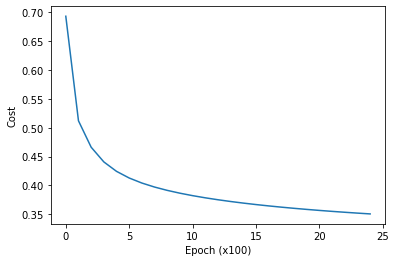

In [4]:
# modelimizi çalıştırıyoruz...
d1 = model(X_train_scaled, Y_train, X_test_scaled, Y_test, epoch = 2500, learning_rate = 0.02, print_cost = True)

import matplotlib.pyplot as plt
plt.plot(d1['costs'])
plt.xlabel('Epoch (x100)')
plt.ylabel('Cost')
plt.show()

In [5]:
# modelin elde ettiği değerler.
d1

{'costs': [0.6931471805599454,
  0.5119392491394066,
  0.46617944218510415,
  0.44068869994791693,
  0.4243394908704487,
  0.4128059331716755,
  0.40407878992971474,
  0.39712693084695794,
  0.3913758536898959,
  0.386482670740984,
  0.3822304705271357,
  0.37847502968517505,
  0.3751162468713882,
  0.3720820136756008,
  0.36931868931047207,
  0.3667852485538532,
  0.36444955732380435,
  0.3622859255273105,
  0.36027345168562064,
  0.3583948728923332,
  0.35663574604061515,
  0.3549838516689328,
  0.35342875090956455,
  0.35196145002983975,
  0.35057414212366145],
 'Y_hat_test': array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
         0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
         0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.]]),
 'Y_hat_train': array([[0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
         0., 1., 0., 0., 0., 0., 1., 0., 0., 1.,

In [6]:
# veri tablosunda bulunan 27 değişkene göre tahmin işlemi.
# sonuç sıfır veya bir çıkacak.
print("Girilen değerlere göre Tahmin: ", np.squeeze(predict(d1["w"],
                                                            d1["b"],
                                                            np.array([[9., 44., 7., 136., 5., 5., 0., 1., 1., 4.4, 10, 0., 
                                13, 35.7, 42., 50.45, 125., 1., 1., 0., 1., 1., 0., 1.482, 3.033, 4.913, 5.]]).T)))

Girilen değerlere göre Tahmin:  0.0


## ÖRNEK 2

Bu örneğimizde de diyabet veri setinden faydalanacağız. <br>
8 farklı değişkene göre, kişinin diyabet olup olmadığını tahmin eden bir lojistik regresyon modeli oluşturacağız.

In [7]:
data = pd.read_csv("datasets/diabetes.csv")
df2 = data.copy()

print(df2.shape)
df2.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Epoch: 0 , Cost: 0.693147
Epoch: 100 , Cost: 0.657489
Epoch: 200 , Cost: 0.629431
Epoch: 300 , Cost: 0.607041
Epoch: 400 , Cost: 0.588901
Epoch: 500 , Cost: 0.573984
Epoch: 600 , Cost: 0.561547
Epoch: 700 , Cost: 0.551047
Epoch: 800 , Cost: 0.542083
Epoch: 900 , Cost: 0.534353
Epoch: 1000 , Cost: 0.527628
Epoch: 1100 , Cost: 0.521732
Epoch: 1200 , Cost: 0.516527
Epoch: 1300 , Cost: 0.511904
Epoch: 1400 , Cost: 0.507774
Epoch: 1500 , Cost: 0.504068
Epoch: 1600 , Cost: 0.500727
Epoch: 1700 , Cost: 0.497704
Epoch: 1800 , Cost: 0.494958
Epoch: 1900 , Cost: 0.492456
Epoch: 2000 , Cost: 0.490169
Epoch: 2100 , Cost: 0.488074
Epoch: 2200 , Cost: 0.486151
Epoch: 2300 , Cost: 0.484379
Epoch: 2400 , Cost: 0.482746
Epoch: 2500 , Cost: 0.481236
Epoch: 2600 , Cost: 0.479838
Epoch: 2700 , Cost: 0.478542
Epoch: 2800 , Cost: 0.477338
Epoch: 2900 , Cost: 0.476218
Epoch: 3000 , Cost: 0.475175
Epoch: 3100 , Cost: 0.474203
Epoch: 3200 , Cost: 0.473295
Epoch: 3300 , Cost: 0.472446
Epoch: 3400 , Cost: 0.4716

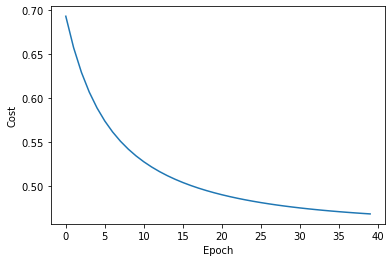

In [8]:
# üstte yapılan işlemlerin benzeri olduğu için,
# ek açıklamalara gerek duymuyoruz.
X = df2.drop(['Outcome'], axis=1)
Y = df2['Outcome']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=20)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = X_train_scaled.T
X_test_scaled = X_test_scaled.T

Y_train = Y_train.to_numpy().reshape(1,X_train_scaled.shape[1])
Y_test = Y_test.to_numpy().reshape(1,X_test_scaled.shape[1])

d2 = model(X_train_scaled, Y_train, X_test_scaled, Y_test, epoch = 4000, learning_rate = 0.003, print_cost = True)

plt.plot(d2['costs'])
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()

## ÖRNEK 3

Bu sefer daha farklı bir örnek yapalım. Elimizde bir takım resimler olduğunu ve bu resimlerin hangisinin kedi resmi olduğunu bulmak zorunda olduğumuzu varsayalım. Bunun için yine hazır bir veri setinden faydalanacağız. Fakat yapacağımız bazı işlemler, ÖRNEK 1 ve ÖRNEK 2'den farklı olacaktır.

In [9]:
# h5 dosyalarını açmak için h5py kütüphanesini ekliyoruz.
import h5py   

# veri setini yükleme fonksiyonu.
def load_dataset():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    
    # train
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) 
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) 

    # test
    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) 
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) 

    # sınıflar (cat or non-cat)
    classes = np.array(test_dataset["list_classes"][:])
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y = [0], Bu bir 'non-cat' resmi.


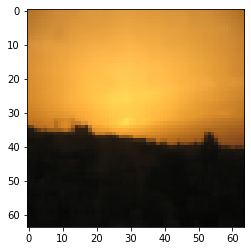

In [10]:
# veri setinde 'cat' veya 'non-cat' olarak etiketlenmiş bir resmi göstermek.
import random
index = random.randint(0,100)
plt.imshow(train_set_x_orig[index]);
print ("y = " + str(train_set_y[:, index]) + 
       ", Bu bir '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  
       "' resmi.")

In [11]:
# veri seti hakkında bilgiler...
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

print ("Train veri sayısı: m_train = " + str(m_train))
print ("Test veri sayısı: m_test = " + str(m_test))
print ("Her bir resmin en/boy değeri: num_px = " + str(num_px))
print ("Her bir resmin boyutu: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x boyut: " + str(train_set_x_orig.shape))
print ("train_set_y boyut: " + str(train_set_y.shape))
print ("test_set_x boyut: " + str(test_set_x_orig.shape))
print ("test_set_y boyut: " + str(test_set_y.shape))

Train veri sayısı: m_train = 209
Test veri sayısı: m_test = 50
Her bir resmin en/boy değeri: num_px = 64
Her bir resmin boyutu: (64, 64, 3)
train_set_x boyut: (209, 64, 64, 3)
train_set_y boyut: (1, 209)
test_set_x boyut: (50, 64, 64, 3)
test_set_y boyut: (1, 50)


Görüldüğü gibi, 259 resmin 50 tanesi test için ayrılmıştır. Bundan sonra yapmamız gereken, bir resimdeki her pikseli o resmin değişkeni olacak biçimde veriye dönüştürmektir. Yani 64 piksellik her resim **64 x 64 x 3 = 12288** adet piksel bilgisine sahiptir. Bu da her bir resim verisi için 12288 adet değişken bulunacak demektir. Değişkenler, $x_1$'den $x_{12288}$'e kadar gidecektir. Aynı şekilde 12288 adet w değeri tespit edilmesi gerekecektir. 

Aşağıda **flatten** olarak isimlendirilen matrisler bu türdendir. Eğitim için 209 resim olduğundan **12288 x 209**'luk bir matris, test için de 50 resime karşılık olarak **12288 x 50**'lik bir matris oluşturulacaktır. Diğer bir ifadeyle bir resmin tüm pikselleri, tek sütunlu bir vektör matrisine dönüştürülmektedir.

<img src="https://raw.githubusercontent.com/zkcplk/Deep-Learning/main/images/4_logistic_regression_image_recognition.png" width="700px">

In [12]:
# flatten matrisler
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)


Bu örnekte standardizasyon işlemini, her piksel bilgisini 255'e bölerek yapacağız. Çünkü piksellerin alabileceği en büyük değer, 255'tir. Maksimum 255 olan pikseller 1, Minimum 0 olan pikseller de, yine aynı bölme işlemine göre 0 olacaktır. Böylece tüm değişkenlerin değerlerini 0 ile 1 arasına çekmiş olacağız.

In [13]:
# standardizasyon ile eğitim ve test verilerinin son kez düzenlenmesi.
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

In [14]:
# her şey hazır olduğuna göre modelimizi çalıştırabiliriz.
d3 = model(train_set_x, train_set_y, test_set_x, test_set_y, epoch = 1500, learning_rate = 0.0017, print_cost = True)

Epoch: 0 , Cost: 0.693147
Epoch: 100 , Cost: 0.565191
Epoch: 200 , Cost: 0.519663
Epoch: 300 , Cost: 0.486091
Epoch: 400 , Cost: 0.458920
Epoch: 500 , Cost: 0.435919
Epoch: 600 , Cost: 0.415925
Epoch: 700 , Cost: 0.398233
Epoch: 800 , Cost: 0.382376
Epoch: 900 , Cost: 0.368020
Epoch: 1000 , Cost: 0.354920
Epoch: 1100 , Cost: 0.342888
Epoch: 1200 , Cost: 0.331775
Epoch: 1300 , Cost: 0.321462
Epoch: 1400 , Cost: 0.311852
Train Accuracy: 92.3444976076555 %
Test Accuracy: 74.0 %


Çıkan doğruluk oranı, böylesi basit bir model için fena değildir. Daha sonra değineceğimiz gizli katmanlı ve daha fazla nörona sahip yapay sinir ağı modelleri, bundan daha iyi sonuçlar verebilir.

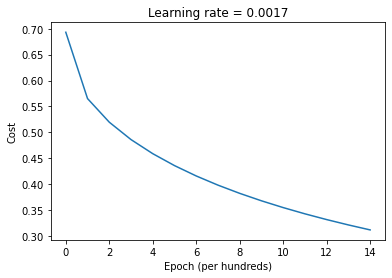

In [15]:
costs = np.squeeze(d3['costs'])
plt.plot(costs)
plt.ylabel('Cost')
plt.xlabel('Epoch (per hundreds)')
plt.title("Learning rate = " + str(d3["learning_rate"]))
plt.show()

In [16]:
d3

{'costs': [0.6931471805599453,
  0.5651905642386902,
  0.5196625730202545,
  0.48609075367460486,
  0.45891999959720525,
  0.4359190886290494,
  0.4159249142704356,
  0.3982333545152499,
  0.3823758393050739,
  0.36802024484432744,
  0.35492045473257366,
  0.34288796277598554,
  0.3317746412074617,
  0.32146167287234695,
  0.31185212093674286],
 'Y_hat_test': array([[1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1.,
         0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1.,
         1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1.,
         1., 0.]]),
 'Y_hat_train': array([[0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
         0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0.,
         0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
         0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0.,

::: DOĞRU TAHMİN ::: Kedi


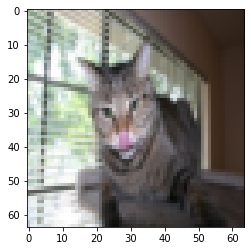

In [17]:
# test verisindeki herhangi bir resmin doğru tahmin edilip edilmediğini kontrol etmek.
# bu kısmı tekrar tekrar çalıştırarak, birkaç resim için inceleme yapılabilir.

index = random.randint(0, 49)
plt.imshow(test_set_x_flatten[:, index].reshape((num_px, num_px, 3)))
cindex = int(np.squeeze(d3["Y_hat_test"])[index])

if cindex: pred = "Kedi"
else: pred = "Kedi değil"

if test_set_y[0,index] == cindex: sonuc = "::: DOĞRU TAHMİN ::: " + pred
else: sonuc = "::: YANLIŞ TAHMİN ::: " + pred

print(sonuc)

Şimdi de learning_rate parametresinin önemine değinelim. Bu parametre, her veri seti için akıllıca seçilmelidir. Çünkü çok büyük seçilmesi halinde, türevler w ve b değerlerini çok hızlı değiştirecek ve minimum cost değeri kaçırılmış olabilecektir. Aşağıda bu örneğe dair bir gif bulunmaktadır.

<img src="https://raw.githubusercontent.com/zkcplk/Deep-Learning/main/images/5_bad_learning_rate_gradient_descent.gif">

Eğer bu değer çok küçük seçilirse, o zaman da cost değerinin küçültülebilmesi için daha fazla epoch gerekecek, bu da daha fazla zaman harcatacaktır. 

<img src="https://raw.githubusercontent.com/zkcplk/Deep-Learning/main/images/6_good_learning_rate_gradient_descent.gif">


Aşağıda farklı learning_rate değerleri, aynı modelde test edilerek sonuçlar tek bir grafikte sunulmuştur. Learning_rate değerleri değiştikçe, modelin test ve train doğruluk değerlerinin nasıl değiştiğini inceleyebilirsiniz.

Learning rate:  0.01
Train Accuracy: 99.52153110047847 %
Test Accuracy: 68.0 %

-------------------------------------------------------

Learning rate:  0.005
Train Accuracy: 97.60765550239235 %
Test Accuracy: 70.0 %

-------------------------------------------------------

Learning rate:  0.003
Train Accuracy: 96.17224880382776 %
Test Accuracy: 74.0 %

-------------------------------------------------------

Learning rate:  0.002
Train Accuracy: 93.77990430622009 %
Test Accuracy: 74.0 %

-------------------------------------------------------

Learning rate:  0.0018
Train Accuracy: 92.82296650717703 %
Test Accuracy: 74.0 %

-------------------------------------------------------

Learning rate:  0.0017
Train Accuracy: 92.3444976076555 %
Test Accuracy: 74.0 %

-------------------------------------------------------

Learning rate:  0.0016
Train Accuracy: 91.86602870813397 %
Test Accuracy: 72.0 %

-------------------------------------------------------

Learning rate:  0.001
Train Accur

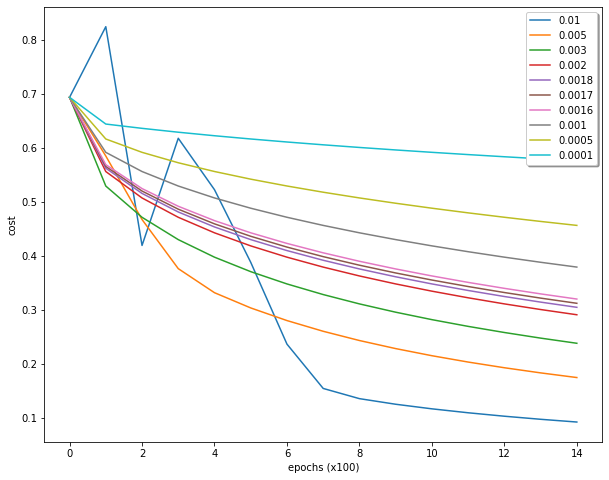

In [18]:
# farklı learning_rate değerlerinin denenmesi.
models = {}
learning_rates = [0.01, 0.005, 0.003, 0.002, 0.0018, 0.0017, 0.0016, 0.001, 0.0005, 0.0001]
plt.figure(figsize=(10,8))

for i in learning_rates:
    print ("Learning rate: ", i)
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, 
                           epoch = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')
    plt.plot(np.squeeze(models[str(i)]["costs"]), label=str(models[str(i)]["learning_rate"]))


plt.ylabel('cost')
plt.xlabel('epochs (x100)')

legend = plt.legend(loc='upper right', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('1')
plt.show()

Şimdi de son olarak, bilgisayarımızdan 5 farklı resim seçelim, o resimleri modelimizde test edelim. 
<br>Modelimiz, seçtiğimiz resimlerin kedi resmi olup olmadığını tahmin etsin.

Modelimiz bu resmin KEDİ OLMADIĞINI söyledi


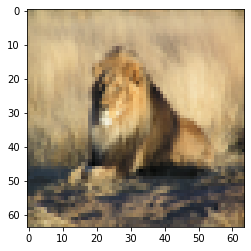

Modelimiz bu resmin KEDİ OLDUĞUNU söyledi


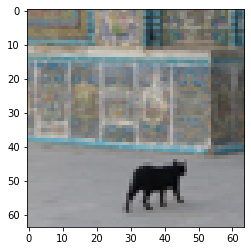

Modelimiz bu resmin KEDİ OLDUĞUNU söyledi


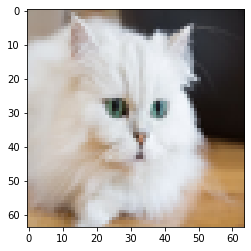

Modelimiz bu resmin KEDİ OLMADIĞINI söyledi


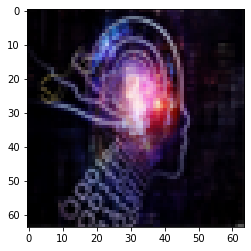

Modelimiz bu resmin KEDİ OLDUĞUNU söyledi


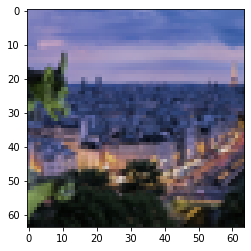

In [19]:
# veri setinde olmayan resimlerle, modelin denenmesi.
from PIL import Image
from matplotlib.pyplot import imshow

for kedi in range(5):
    # resim dosyasının dizini
    fname = "images/kedi" + str(kedi) +".jpg" 

    # resim dosyası açılır, üstte belirlenen num_px değerine resize olur.
    img = Image.open(fname)
    im_resized = img.resize(size=(num_px, num_px))
    
    # resmin piksellerinin standardizasyonu
    arr_img = np.asarray(im_resized)
    arr_img = arr_img/255.
    
    # resmin piksellerinin predict() fonksiyonunda kullanılabilir hale getirilmesi.
    my_image = arr_img.reshape((1, num_px*num_px*3)).T
    
    # tahmin işlemi.
    my_predicted_image = predict(d3["w"], d3["b"], my_image)

    # tahmin etiketinin belirlenmesi.
    if np.squeeze(my_predicted_image):
        pred = "KEDİ OLDUĞUNU"
    else:
        pred = "KEDİ OLMADIĞINI"
    
    # sonuç.
    print("Modelimiz bu resmin", pred ,"söyledi")

    # tahmin edilen resmin ekranda gösterilmesi.
    plt.figure()
    plt.imshow(np.asarray(im_resized))
    plt.show()

Modelimiz, verdiğimiz rastgele 5 resmin 4'ünü doğru tahmin etti.

<h4 style="text-align:right">Zeki ÇIPLAK</h4>